Problem:
Delve into online retail secctor analyzing a transactional dataset from UK based retailer

dataset Documents all transaction between 2010 and 2011.

Primary Objective ---- amplify the efficency of marketing strategies and boost sales through customer segmentation.

Aim ------- Transform transactional dataset into Customer-Centric dataset by creating new features that will facilitate the segmetation of customer into distinct groups using the K-Means Clustering algorithm.

segmentation allow us tounderstand distinct Profiles and preferences of different customer groups.

Develop recommendation system ------- that suggest top-selling Products to customer within each segement who haven't Purchased those items.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("data.csv",encoding="ISO-8859-1")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Variable	Description

InvoiceNo	Code representing each unique transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode	Code uniquely assigned to each distinct product.

Description	Description of each product.

Quantity	The number of units of a product in a transaction.

InvoiceDate	The date and time of the transaction.

UnitPrice	The unit price of the product in sterling.

CustomerID	Identifier uniquely assigned to each customer.
Country	The country of the customer.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.describe(include="object").T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


Quantity:

the average quantity of produccts in a transaction is 9.55 

the quantity are wide range, with min of -80995 and a max of 80995. the negative value indicates returned or cancelled orders, which need to be handle appropriately 

the std is quite large, indicating a significant spread in data. the presence of outliers is indicated by a large differencce between in max and 75th percentile values.

UnitPrice 

Avg unit price of the product is 4,6 rupees 

this unit price also shows the wide range from min of -11062.06 to 38970, which suggest the presence of error or noise in th data, because the negative value doesn't make sense.

high std implies the presence of outliers, the large difference btw 75th percentile and max.

Customer ID:

there are 406829 non null values. 

the customer id ranges from 12346 to 18287, helping in identify unique customers 

Invoice No:

it has 25900 unique number, indicating that many transaction are done 

the invoice number 573585 are apperaing 1114 times, Possibly indicating representing a largee transaction or an order with multiple items 

StockCode 

there are 541909 products in which 4070 are unique products and stockcode 85123A are top product with 2313 freq.

Description 

there are 540455 description, which represents missing values in the dataset 

it has 4223 unique description,WHITE HANGING HEART T-LIGHT HOLDER as top description with 2369 freq

InvoiceDate 

there are 541909 dates represents no missing values.

23260 unique date represents numbers days transaction taken place.

10/31/2011 14:41 has most transaction happended

Country 

there are 541909 data repersents no missing value and 38 unique country uk being the majority of the transaction originated.




Text(0.5, 0, 'Percentage %')

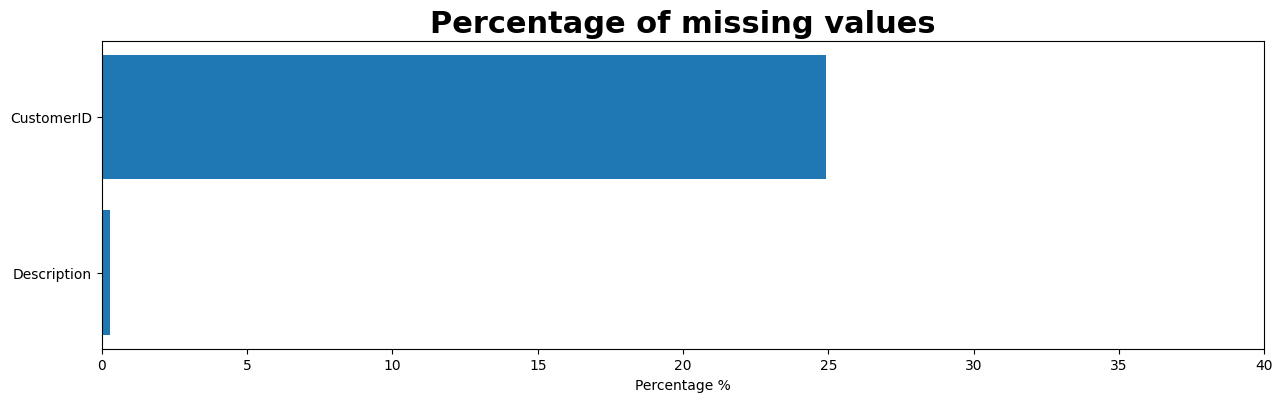

In [7]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0])*100

missing_percentage.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(15,4))

ax.barh(missing_percentage.index, missing_percentage)
# for i in range(len(missing_percentage)):
#     value = missing_percentage[i]
#     name = missing_percentage.index[i]

ax.set_xlim([0,40]) #setting the limits

plt.title("Percentage of missing values", fontweight = "bold", fontsize=22)
plt.xlabel("Percentage %")



Handling the missing values Strategy 

Customer Id ::::::

the customer id column contains nearly a quater missing data. this column is essential for clustering customes and creating recommendation system, imputing such a large percentage of missing values might introduce significant bias or noise into the analysis 

since the clustering is based on customer behaviour and preferences, its curcial to have accurate data on customer identifiers, Therefore, removing the rows with missing Customer Id seems to be ost resonable approach to maintain intergity of the cluster and the analysis 

Description 

this column has minor percentage missing value. however it has been noticed that the inconsitencies in the data where the same stockcode does not always have the same description. this indicates data quality issued potential errors in the product descriptions 

Given this inconsistencies imputing the missing description based on stockcode might not be reliable moreover since the missing percentage is quite low it would be prudent to remove the rowd with missing description to avoid propagating errord and inconsitencies into the subsequent analyses 




In [8]:
df[df["CustomerID"].isnull() | df["Description"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [9]:
df1 = df.dropna(subset=["Description", "CustomerID"])

In [10]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
duplicate_rows = df[df.duplicated(keep=False)]

duplicate_rows_sorted = duplicate_rows.sort_values(by=["InvoiceNo", "StockCode", "Description", "CustomerID", "Quantity"])

duplicate_rows_sorted.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom


Handling Duplicate strategy 

presence of completely identical rows including identical transaction times suggest that these might be data recording errors rather than genuine repetated transaction, keeping those duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.

Therefore, we are going to remove these completely identical duplicate rows from the dataset. 

Removing this data will help in achieving a cleaner dataset, which in trun would aid in building more accurate customer cluster based on their uniqye purchasing behaviours. Moreover it would help in creating a more precise recommendation system by correctly identifying the products with most purcahse.



In [12]:
df1.duplicated().sum()

5225

In [13]:
df1.drop_duplicates(inplace=True)

C:\Users\vishw\AppData\Local\Temp\ipykernel_20408\4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [14]:
df1.shape

(401604, 8)

Treating Cancelled Transaction 

we create new column called Transaction_satus, where InvoiceNo starts with C assign with cancelled transaction otherwise call completed transaction. 
Subsequently we will analyz these rows to understand their common characteristics or patterns



In [15]:
df1["Transaction_Status"] = np.where(df1["InvoiceNo"]. astype(str).str.startswith("C"), "Cancelled", "Completed")
df1["Transaction_Status"].head(5)
cancelled_transaction = df1[df1["Transaction_Status"] == "Cancelled"]

cancelled_transaction.describe().drop("CustomerID", axis=1)


C:\Users\vishw\AppData\Local\Temp\ipykernel_20408\839449464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Transaction_Status"] = np.where(df1["InvoiceNo"]. astype(str).str.startswith("C"), "Cancelled", "Completed")


,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000



All quantities in the cancelled transaction are negative indicating that these order that were cancelled 

the unit price has wide range, showing that a variety products from high to low were part of the cancelled products 



In [16]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


strategy for handling cancelled transaction 

by project objective customer cluster based on their purchasing behaviour and preferences and to eventually create recommendation system. its essential to study customer cancellation pattern. Therefore the strategy is to retain these cancellation tranasction in the dataset, marking them distinctly to facilate further analysis

improve the clustering process by incorporating patterns and trends observed in cancellation data, which miight represents certain customer behaviour or preferences 

Allow the recommendation system to possibly prevent suggesting products that have highly likelihood of being cancelled, thereby improving the quality of recommendation .

In [17]:
cancelled_percentage = (cancelled_transaction.shape[0] / df1.shape[0] )*100

cancelled_percentage

2.209141343213713

In [18]:
unique_stock_codes = df1["StockCode"].unique()


unique_stock_codes

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

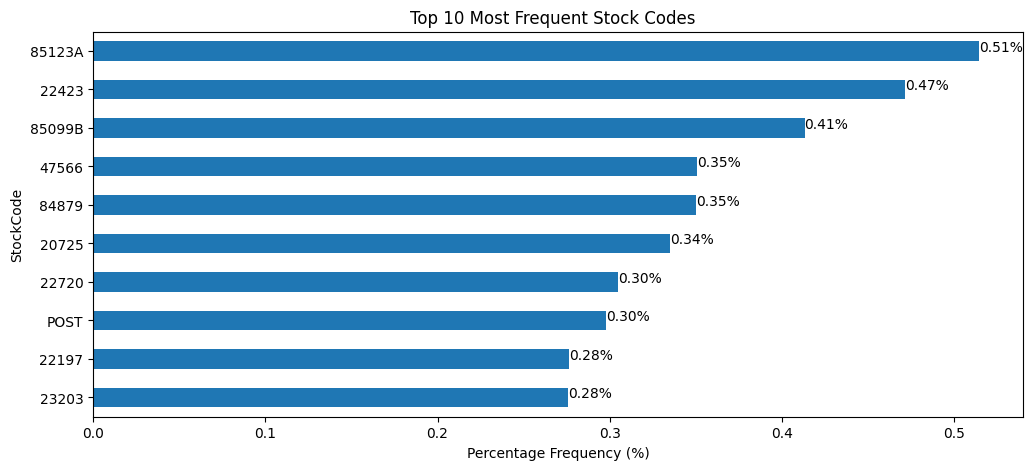

StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: proportion, dtype: float64

In [19]:
top_10_stock_codes = df1["StockCode"].value_counts(normalize=True).head(10)*100

plt.figure(figsize=(12,5))
top_10_stock_codes.plot(kind="barh")

index = 0

for i in range(len(top_10_stock_codes)):
    index = i
    value = top_10_stock_codes[i]
    plt.text(value, index, f'{value:.2f}%', fontsize=10 )

plt.title("Top 10 Most Frequent Stock Codes  ")
plt.xlabel("Percentage Frequency (%)")
plt.ylabel("StockCode")
plt.gca().invert_yaxis()
plt.show()
top_10_stock_codes


inference on stockcode 

Product variety: 
the dataset contains 3684 unique stockcodes indicating a substantial variety of products available in the online retail store. the diversity can potential lead to the identification of distinct customer clusters, with preference for different types of product 

Popular items:

A closer look at the top 10 most frequent stock code can offers insights into the popular products or categories that are frequently purchased by customer 

Stock Code Anomalies 

Here we obsereve that while most stock codes are composed of 5 to 6 characters there are some anamolies like the code "POST". These anamolies might represents services or non-product transaction (perhaps postage fees) rather than actual products. To maintain the focus of the project which is clustering based on product purchase and creating a recommendatio nsystem these anamolies should be further investigated and possibly related appropriately to ansure data intergity. 

to understand deper into identifying these anamolies. we explore the frequenct of the umber of numeric characters in the stock code, which can provide insights into the nature of these unusual entries.

In [20]:
df1[df1["StockCode"] == "POST"].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583.0,France,Completed
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791.0,Netherlands,Completed
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.0,12662.0,Germany,Completed
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.0,12738.0,Germany,Completed
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.0,12686.0,France,Completed


In [21]:
unique_stock_codes

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [22]:
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x:sum(c.isdigit() for c in str(x))).value_counts()

print("Value counts of numeric character frequencies in unique stock code")
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock code
5    3676
0       7
1       1
Name: count, dtype: int64


inference from output 

majority of unique stock code contain exactly 5 numeric characters which seems to br standard format for representing product code in dataset 

there are few anamolies 7 stock codes contains no numeric characters and 1 stock code contains only one numeric character, these are clearly deviating from the standard format and need further understanding to understanf their nature and whether they represents valid product transacction 

now we identify the stock code contains 0 or 1 numeric characters to further understand these anamolies 





In [23]:
anamalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0,1)]

print("Anamalous Stock Code")
for code in anamalous_stock_codes:
    print(code)

Anamalous Stock Code
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [24]:
# CALCULATING PERCENTAGE OF THESE ANAMOLIES 

percentage_anomalous = (df1["StockCode"].isin(anamalous_stock_codes).sum()/len(df1))*100

print("percentage of anomalous stockcode ")
print(percentage_anomalous)

percentage of anomalous stockcode 
0.4768378801007958


form the percentage of anomalous stockcode 0.48% we observe these code small in number 

these code seems to represent non-product transaction like bank charges , post etc since these are not actuall products and very small in proportion of dataset, this might introduce the noise in clustering and recomendation system

since the context of the project which aims to customer cluster based on product we remove the anomalous stockcode which are not a genuine product.

we remove these anomalous stockcode from the dataset 


In [25]:
df1 = df1[~df1["StockCode"].isin(anamalous_stock_codes)]
df1.shape

(399689, 9)

Cleaning Description column 

count unique description 

plot top 10 


In [26]:
descrption_counts = df1["Description"].value_counts()
descrption_counts

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
FRYING PAN RED POLKADOT                  1
PEG BAG APPLE DESIGN                     1
PINK POLKADOT KIDS BAG                   1
BLACK DIAMOND CLUSTER NECKLACE           1
SET 12 COLOURING PENCILS DOILEY          1
Name: count, Length: 3888, dtype: int64

In [27]:
a = df1["StockCode"].nunique()
a

3676

In [28]:
b = df1["Description"].nunique()
b

3888

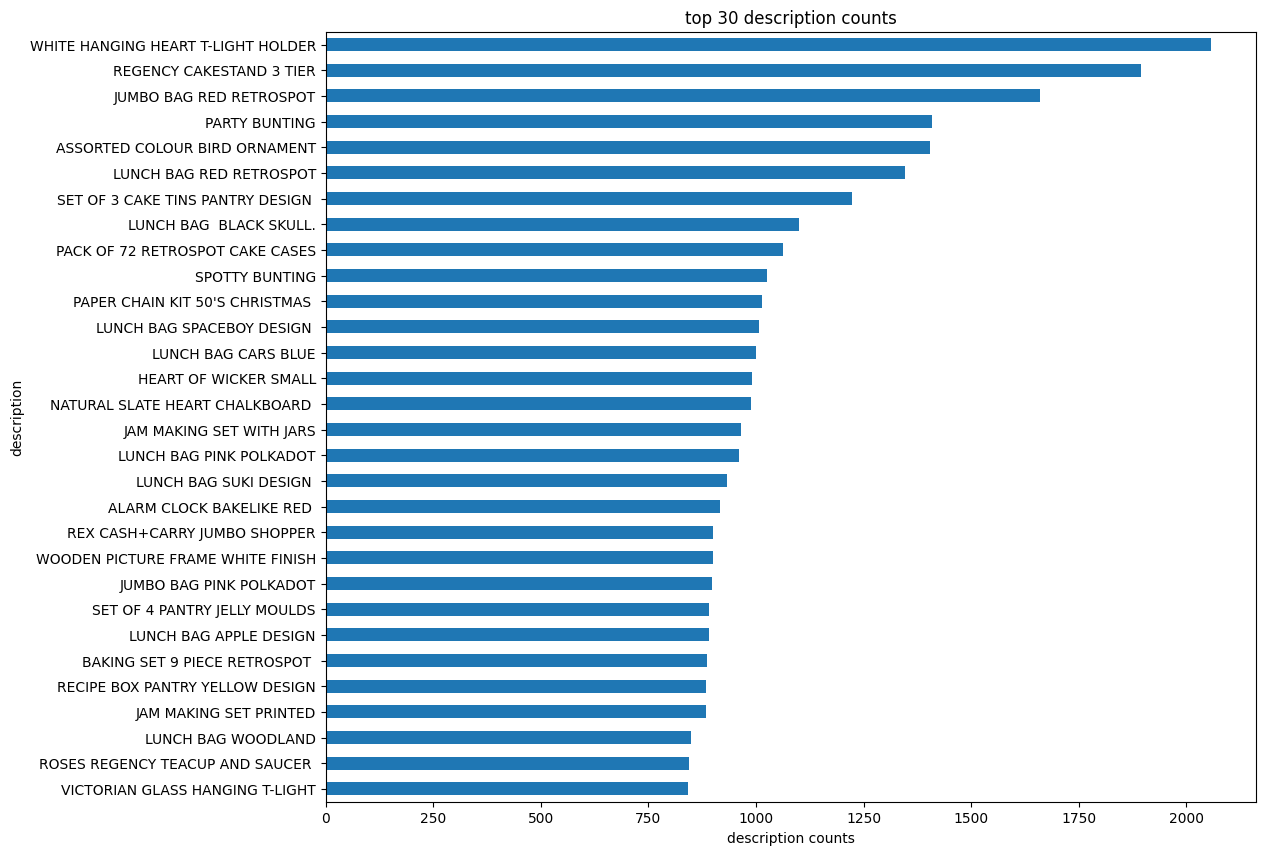

In [29]:
top_30_description = descrption_counts[:30]

plt.figure(figsize=(12,10))
top_30_description.plot(kind='barh')

plt.title("top 30 description counts")
plt.xlabel("description counts")
plt.ylabel("description")

plt.gca().invert_yaxis()
plt.show()

Here all descriptions are in uppercase, which might be the standard format . however consider the inconsitencies and anomalies we check for any lowercase description, or any mix style description.

In [30]:
lowecase_description = df1["Description"].unique()
lowecase_description = [desc for desc in lowecase_description if any(char.islower() for char in desc)]

print("the description which contains the lowercase letter")
print("-"*50)
for i in lowecase_description:
    print(i)

the description which contains the lowercase letter
--------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


from above list "Next Day Carriage" and "High Resolution Image" are not product it may service details. 

strategy 

---------------> remove the service related description form the dataset 

---------------> for maintaing the uniformity we change the remaining lowercase description to uppercase

In [31]:
service_related_description = ["Next Day Carriage", "High Resolution Image"]

service_related_percentage = (len(df1[df1["Description"].isin(service_related_description)])/ len(df1["Description"]))*100

print("the percentage of service related description in dataset is")
print("-"*60)
print(service_related_percentage)

the percentage of service related description in dataset is
------------------------------------------------------------
0.02076614567826485


In [32]:
df1 = df1[~df1["Description"].isin(service_related_description)]

df["Description"] = df1["Description"].str.upper()


In [33]:
df1["UnitPrice"].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [34]:
df1[df1["UnitPrice"] == 0].describe()[["Quantity"]]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


inferences 

the transaction with unit price of zero are 33 in number 

the quantity range from 1 to 12540 there are substantial standard deviation.

these transaction may introduce the noise in project so we remove it 

In [35]:
df1 = df1[df1["UnitPrice"] > 0]
df1.shape[0]

399573

OUTLIER TREATMENT

In k-Means clustering, the algorithm sensitive to both the scale of the data the presence of outliers, as they can significantly influence the position of centroids potentially leading to incorrect cluster assignments. However considering the context of this project where the final goal project to understand customer behaviour and preferences through K-Means, it would be more wise to address the issue of outliers after the features engineering phase where we create a customer centric dataset. so we don't remove the outliers. 


In [36]:
df1.reset_index(drop=True, inplace=True)
df1.shape[0]

399573

FEATURES ENGINEERING

To create customer centric dataset for clustering and recommendation 

RFM FEATURES 

RFM is a method where used for analyzing customer value and segmenting the customer base. 

RECENCY (R): The metric how recntly the customr has made a purchase. A lower recency value means cutomer made purchase recently, indicating higher enagement with the brand 

FREQURNCY(F): This metric signifies how often a customer makes a pruchase within a certain period. higher frequency value indicates customer who interacts with the business more often, this suggest higher loyalty or satisfication 

MONETARY(M): This metric represents the total amount of money a customer has spent over a certain period. Customer who have higher value have contributed to business indicating their potential high life time.

these metrics help in understanding customer buying behavour and preferences which play important role in this project. 


In [37]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status'],
      dtype='object')

RECENCY(R)

Here we understand the customer recent purchase. it helps us to indentify the engagement level of customer. 

DAYS SINCE LAST PURCHASE: 

this feature represents the number of days that have passed since the customer last purchase. by understanding the recency of purchase, business can tailor their marketing strategies to re-engage customer who have not made a purchase in a while, potentially increasing customer retention and fostering loyallty.



In [38]:
df1["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df1["InvoiceDay"] = df1["InvoiceDate"].dt.date

customer_data = df1.groupby("CustomerID")["InvoiceDay"].max().reset_index()

most_recent_date = df1["InvoiceDate"].max()

customer_data["InvoiceDay"] = pd.to_datetime(customer_data["InvoiceDay"])

most_recent_date = pd.to_datetime(most_recent_date)

customer_data["Days_Since_Last_Purchase"] = (most_recent_date - customer_data["InvoiceDay"]).dt.days

customer_data.drop(columns=["InvoiceDay"], inplace=True)


In [39]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,303
1,12347.0,3
2,12348.0,97
3,12349.0,21
4,12350.0,280


the above customer_data dataframe for customer centric which eventually contain all the customer-based features we plan to create 


FREQUENCY(F):

Here we create two features that quantify the frequency of customer engagement with the retailer. 

TOTAL_TRANSACTION: This features contains total number of transaction made by a ccustomer. it helps in understanding the engagement level of a customer with the retailer.

TOTAL PRODUCTS PURCHASED: This features indicates the total number of products purchased by the customer across all transaction. It gives an insight into the customer's buying behaviour in terms of the volume of products purchased 

In [40]:
total_transactions = df1.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

total_transactions.rename(columns={"InvoiceNo": "Total_Transactions"}, inplace=True)

total_products_purchased = df1.groupby("CustomerID")["Quantity"].sum().reset_index()

total_products_purchased.rename(columns={"Quantity" : "Total_Products_Purchased"}, inplace=True)


customer_data = pd.merge(customer_data, total_transactions, on="CustomerID")
customer_data = pd.merge(customer_data, total_products_purchased, on="CustomerID")

print(customer_data.shape)
customer_data.head()


(4362, 4)


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,303,2,0
1,12347.0,3,7,2458
2,12348.0,97,4,2332
3,12349.0,21,1,630
4,12350.0,280,1,196


MONETARY(M): 

Here we add two features 

TOTAL SPEND: 

The features represents the total amount of money spent by each customer.It is calculated as the sum of the products of unitprice and quantity for all transaction made by a customer. This feature helps to identify revenue generated by each customer, which indicator of customer's value to the business.

AVERAGE TRANSACTION VALUE: 

This feature is calculated by (Total spend/Total Transaction) for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavoiur of customer per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [41]:
df1["Total_Spend"] = df1["UnitPrice"]*df1["Quantity"]
total_spend = df1.groupby("CustomerID")["Total_Spend"].sum().reset_index()


# here we adding totalspend column twice in customer data which gives _x and _y columns 

customer_data = pd.merge(customer_data, total_spend, on="CustomerID")


average_transaction_value = total_spend.merge(total_transactions, on="CustomerID")


average_transaction_value["Average_Transaction_value"] = average_transaction_value["Total_Spend"] / average_transaction_value["Total_Transactions"]

# below line already addded in the customer data 

customer_data = pd.merge(customer_data, average_transaction_value[["CustomerID", "Average_Transaction_value"]], on="CustomerID")

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value
0,12346.0,303,2,0,0.00,0.000000
1,12347.0,3,7,2458,4310.00,615.714286
2,12348.0,97,4,2332,1437.24,359.310000
3,12349.0,21,1,630,1457.55,1457.550000
4,12350.0,280,1,196,294.40,294.400000


In [42]:
# # Dropping the redundant columns
# customer_data_cleaned = customer_data.drop(columns=[
#     'Total_Transactions_x', 'Total_Products_Purchased_x', 
#     'Total_Spend_x', 'Average_Transaction_value_x', 
#     'Total_Transactions_y', 'Total_Products_Purchased_y', 
#     'Total_Spend_y', 'Average_Transaction_value_y'
# ])

# # Display the cleaned data
# customer_data_cleaned.head()


PRODUCT DIVERSITY 

Here we understand diversity in product purchase behaviour of customer. understanding this helps us to crafting personalized marketing strategied and product recommendation

UNIQUE PRODUCTS PURCHASED :

This features represents the number of distinct products bought by customer. A higher value indicates that the customer has a diverse taste or preference buying a wide range of products, while a lower value might indicates the focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which is important input in recommendation system. 

In [43]:
unique_products_purchased = df1.groupby("CustomerID")["StockCode"].nunique().reset_index()
unique_products_purchased.rename(columns={"StockCode": "Unique_Products_Purchased"}, inplace=True)

customer_data = pd.merge(customer_data, unique_products_purchased, on="CustomerID")

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased
0,12346.0,303,2,0,0.00,0.000000,1
1,12347.0,3,7,2458,4310.00,615.714286,103
2,12348.0,97,4,2332,1437.24,359.310000,21
3,12349.0,21,1,630,1457.55,1457.550000,72
4,12350.0,280,1,196,294.40,294.400000,16


BEHAVIOURAL FEATURES 

Here we try to understand and find the pattern and behaviours of customer. 
These features gives us insight into the customer preferences regarding when they are like to shop, which is important information for personalizing their shoppinf experience. 

AVERAGE DAYS BETWEEN PURCHASE: average number of days a customer waits before making another purchase. understanding this helps us to predict when the customer is likely to make their nextt purcahse. used for targeted marketing and personalized promotions. 

FAVORITE SHOPPING DAY: This denotes the day of the week when the customer shops the most. this helps in identifying the prefered shoping days of different customer segments, used to optimize marketing strategies and promotions for different days of the week. 

FAVORITE SHOPPING HOURS: Hour of the day when the customer shop the most. This helps in marketing and promotions to align with the times when different customer segments are more active 




In [45]:
df1["Day_Of_Week"] = df1["InvoiceDate"].dt.dayofweek
df1["Hour"] = df1["InvoiceDate"].dt.hour


# Average days between consecutive purchase 
days_between_purchase = df1.groupby("CustomerID")["InvoiceDay"].apply(lambda x: (x.diff().dropna()).apply(lambda y : y.days))

average_days_between_purchase = days_between_purchase.groupby("CustomerID").mean().reset_index()

average_days_between_purchase.rename(columns={"InvoiceDay": "Average_Days_Between_Purchase"}, inplace=True)




In [48]:
days_between_purchase

CustomerID        
12346.0     37339      0
12347.0     10363      0
            10364      0
            10365      0
            10366      0
                      ..
18287.0     286817     0
            286818     0
            312503    22
            312504     0
            312505     0
Name: InvoiceDay, Length: 395211, dtype: int64

In [52]:
# Find the favorite shopping day of the week 

favorite_shopping_day = df1.groupby(["CustomerID", "Day_Of_Week"]).size().reset_index(name="Count")
favorite_shopping_day

,CustomerID,Day_Of_Week,Count
0,12346.0,4,2
1,12347.0,0,31
2,12347.0,1,69
3,12347.0,2,71
4,12347.0,3,11
...,...,...,...
11198,18283.0,3,189
11199,18283.0,4,29
11200,18283.0,6,24
11201,18287.0,1,67


In [54]:


favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby("CustomerID")["Count"].idxmax()][["CustomerID", "Day_Of_Week"]]
favorite_shopping_day

,CustomerID,Day_Of_Week
0,12346.0,4
3,12347.0,2
8,12348.0,4
9,12349.0,6
10,12350.0,6
...,...,...
11191,18280.0,2
11192,18281.0,3
11194,18282.0,4
11196,18283.0,1


In [57]:
# Find the favourite shopping hour of the day. 

favorite_shopping_hour = df1.groupby(["CustomerID", "Hour"]).size().reset_index(name="Count")
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby("CustomerID")["Count"].idxmax()][["CustomerID", "Hour"]]

favorite_shopping_hour

,CustomerID,Hour
0,12346.0,17
2,12347.0,10
6,12348.0,9
10,12349.0,16
11,12350.0,14
...,...,...
14170,18280.0,16
14171,18281.0,15
14172,18282.0,13
14179,18283.0,15


In [59]:
# Merge the new features into the customer_data dataframe 

customer_data = pd.merge(customer_data, average_days_between_purchase, on="CustomerID")
customer_data = pd.merge(customer_data, favorite_shopping_day, on="CustomerID")
customer_data = pd.merge(customer_data, favorite_shopping_hour, on="CustomerID")
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase_x,Day_Of_Week_x,Hour_x,Average_Days_Between_Purchase_y,Day_Of_Week_y,Hour_y
0,12346.0,303,2,0,0.00,0.000000,1,0.000000,4,17,0.000000,4,17
1,12347.0,3,7,2458,4310.00,615.714286,103,1.718232,2,10,1.718232,2,10
2,12348.0,97,4,2332,1437.24,359.310000,21,8.192308,4,9,8.192308,4,9
3,12349.0,21,1,630,1457.55,1457.550000,72,0.000000,6,16,0.000000,6,16
4,12350.0,280,1,196,294.40,294.400000,16,0.000000,6,14,0.000000,6,14


GEOGRAPHICAL FEATURES 

COUNTRY: This features helps us to understand region-specific buying patterns and preferences. This is critical for personalizing marketing strategies and inventory planing. it can be instrument in logistic and supply chain management, particularly for  supply chain optimization, like shipping and delivery

In [63]:
df1["Country"].value_counts(normalize=True).head()*100

Country
United Kingdom    89.097111
Germany            2.272176
France             2.040178
EIRE               1.843968
Spain              0.616158
Name: proportion, dtype: float64

INFERENCES 

Given that a major protion of transaction originating from the United Kingdom, we might consider creating a binary features indicating whether the transaction is from UK or not. This approach can potentially streamline the clustering process without losing critical geographical info. this also due to algorithm we considering K-Means which is sensitive to the dimensionality of the features space 

METHODOLOGY 

group the data by customer and country and calculate the number of transaction per country for each customer 

Next we identify the main country for each customer(the country which have the max trasaction)

Then we create the binary column indicating whether the customer id from the UK or not.

Finally, we will this information with the customer_data dataframe to include the new features in our analysis. 




In [64]:
customer_country = df1.groupby(["CustomerID", "Country"]).size().reset_index(name="Number_of_Transaction")

# Get the country with maximum numebr of transaction for each customer
customer_main_country = customer_country.sort_values("Number_of_Transaction", ascending=True).drop_duplicates("CustomerID")

# Create the binary columns indicating whether the customer is from UK or not 
customer_main_country["Is_UK"] = customer_main_country["Country"].apply(lambda x: 1 if x == "United Kingdom" else 0)

customer_data = pd.merge(customer_data, customer_main_country[["CustomerID", "Is_UK"]], on="CustomerID", how="left")

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase_x,Day_Of_Week_x,Hour_x,Average_Days_Between_Purchase_y,Day_Of_Week_y,Hour_y,Is_UK
0,12346.0,303,2,0,0.00,0.000000,1,0.000000,4,17,0.000000,4,17,1
1,12347.0,3,7,2458,4310.00,615.714286,103,1.718232,2,10,1.718232,2,10,0
2,12348.0,97,4,2332,1437.24,359.310000,21,8.192308,4,9,8.192308,4,9,0
3,12349.0,21,1,630,1457.55,1457.550000,72,0.000000,6,16,0.000000,6,16,0
4,12350.0,280,1,196,294.40,294.400000,16,0.000000,6,14,0.000000,6,14,0


In [65]:
customer_main_country.head()

,CustomerID,Country,Number_of_Transaction,Is_UK
2939,16323.0,United Kingdom,1,1
3243,16737.0,United Kingdom,1,1
583,13099.0,United Kingdom,1,1
4239,18113.0,United Kingdom,1,1
598,13120.0,United Kingdom,1,1


In [66]:
customer_data["Is_UK"].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

CANCELLATION INSIGHTS 

Here we try to understand the cancellation pattern of customer to gain insights which helps us to enhance the customer segmentation model. 


CANCELLATION FREQUENCY: total numeber of transaction cancelled by a customer. by understandin this we know the customer who are morelikely to cancell the transaction. this could be a indicator or other issues and understanding this helps us to tailor the strategies to reduce cancellation and enhance customer satisfaction. 


CANCELLATION RATE: This represents the proportion of transaction cancelled out of all transaction done by customer. A hight cancellation rate might indicates the unsatisfied customer segment. by identifing this segment we develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate
